### Zadanie

1. Načítajte súbor `Accidents.csv`, rozdeľte ho na tri tabuľky podľa hodnôt atribútu `Accident_Severity` (do prvej tabuľky vyberte iba hodnoty 1 - `Fatal`, do druhej 2 - `Serious` a do tretej 3 - `Slight`). (2b)



In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

data_accidents = pd.read_csv("data/Accidents.csv")

fatal = data_accidents.query("Accident_Severity == 1")
serious = data_accidents.query("Accident_Severity == 2")
slight = data_accidents.query("Accident_Severity == 3")


2. Z tabuľky pre hodnoty `Slight` náhodne vyberte 10% príkladov pomocou metódy `sample`. Nasledujúci príklad kódu zobrazuje použitie tejto metódy. (2b)

In [46]:
sample_slight = slight.sample(frac=0.1, random_state=1234)
sample_slight.head()


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
155162,2005470503765,579630.0,111550.0,0.551871,50.875462,47,3,2,1,16/05/2005,...,0,0,1,8,1,0,0,1,2,E01020993
169895,2005520168041,362930.0,181790.0,-2.535853,51.533742,52,3,4,4,15/12/2005,...,0,0,1,1,2,4,0,2,1,E01015000
56535,2005100970605,439700.0,558790.0,-1.382107,54.922251,10,3,2,1,06/12/2005,...,0,0,4,2,2,0,0,1,1,E01008788
54293,2005100470005,418770.0,570480.0,-1.707898,55.028522,10,3,2,1,21/06/2005,...,0,0,6,1,1,0,6,2,1,E01008458
29150,200504AM05035,332570.0,434320.0,-3.025298,53.800791,4,3,1,1,28/06/2005,...,0,0,1,1,1,0,0,1,1,E01012696


3. Spojte všetky tri tabuľky do upravenej tabuľky `Accidents`, ktorá bude obsahovať 10% príkladov `Slight` a všetky príklady závažnosti `Fatal` a `Serious`. Po spojení by ste mali mať 45 021 príkladov. (2b)

In [47]:
accidents = pd.concat([fatal, serious, sample_slight], ignore_index=True, sort=False)
print(accidents.shape[0])


45021


4. Spojte upravenú tabuľku `Accidents` s tabuľkou `Vehicles` podľa kľúča `Accident_Index` tak, aby vo výslednej tabuľke boli iba vozidla nehôd z upravenej tabuľky `Accidents`. Po spojení by ste mali dostať redukovanú trénovaciu množinu s menším počtom príkladov, ktorú budete ďalej používať pre analýzu dát. Keďže sme zmenšili počet menej závažných príkladov, zvýšili sme tým váhu príkladov s väčšou závažnosťou. (2b)


In [48]:
data_vehicles = pd.read_csv("data/Vehicles.csv")

data_all = pd.merge(left=accidents, right=data_vehicles, left_on="Accident_Index", right_on="Accident_Index")
print(accidents.shape[0], data_vehicles.shape[0], data_all.shape[0])
data_all.head()


45021 366236 79382


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501CP00085,532120.0,181370.0,-0.097293,51.515757,48,1,2,2,18/05/2005,...,1,2,1,40,7,984,1,-1,6,1
1,200501CP00085,532120.0,181370.0,-0.097293,51.515757,48,1,2,2,18/05/2005,...,1,2,1,20,4,-1,-1,-1,-1,-1
2,200501RY10515,545840.0,175950.0,0.098065,51.463682,1,1,1,1,09/11/2005,...,1,15,1,59,9,9600,2,5,3,1
3,200501TA00003,526450.0,182350.0,-0.178613,51.525861,1,1,2,1,06/01/2005,...,1,15,1,25,5,-1,-1,-1,-1,-1
4,200501TA00003,526450.0,182350.0,-0.178613,51.525861,1,1,2,1,06/01/2005,...,1,15,1,29,6,1596,1,3,5,1


5. Pre ďalšiu analýzu vyberte iba nasledujúce atribúty:
    * `Day_of_Week`
    * `1st_Road_Class`
    * `Road_Type`
    * `Light_Conditions`
    * `Weather_Conditions`     
    * `Road_Surface_Conditions`
    * `Urban_or_Rural_Area`
    * `Vehicle_Type`
    * `Sex_of_Driver`
    * `Age_of_Driver`
    * `Engine_Capacity_(CC)`
    * `Age_of_Vehicle`
    * `Accident_Severity` 
    
Takúto selekciu atribútov urobíme kvôli odstráneniu redundantných atribútov v datasete. Nepoužijeme redundantné atribúty popisujúce napr. geolokalitu, atď., prípadne odstránime atribúty, ktoré pre predikciu nemôžu byť použité (nie sú známe pred výskytom samotnej nehody). (2b)


In [49]:
data_select = data_all[["Day_of_Week", "1st_Road_Class", "Road_Type", "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions", "Urban_or_Rural_Area", "Vehicle_Type", "Sex_of_Driver", "Age_of_Driver", "Engine_Capacity_(CC)", "Age_of_Vehicle", "Accident_Severity"]]
data_select.head()


,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity
0,4,3,2,1,1,1,1,5,1,40,984,-1,1
1,4,3,2,1,1,1,1,1,1,20,-1,-1,1
2,4,5,6,1,1,1,1,11,1,59,9600,5,1
3,5,4,6,1,1,2,1,1,1,25,-1,-1,1
4,5,4,6,1,1,2,1,9,1,29,1596,3,1


6. Spočítajte počet chýbajúcich hodnôt pre jednotlivé atribúty. Vhodne doplňte chýbajúce hodnoty (pozor: chýbajúce hodnoty sú označené -1).(4b)


In [50]:
newdata = data_select
newdata = newdata.replace (-1, np.nan)
newdata.isna().sum()


Day_of_Week                    0
1st_Road_Class                 0
Road_Type                      0
Light_Conditions               0
Weather_Conditions             0
Road_Surface_Conditions       80
Urban_or_Rural_Area            0
Vehicle_Type                  14
Sex_of_Driver                  7
Age_of_Driver               7784
Engine_Capacity_(CC)       24978
Age_of_Vehicle             27406
Accident_Severity              0
dtype: int64

Road_Surface_Conditions mean: 1.3471, median: 1.0000


0

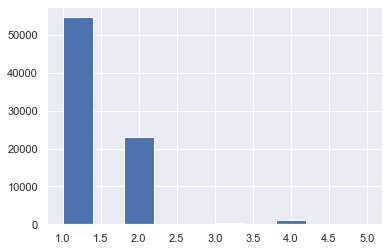

In [51]:
h1 = newdata["Road_Surface_Conditions"].hist()

rsc_mean = newdata["Road_Surface_Conditions"].mean()
rsc_median = newdata["Road_Surface_Conditions"].median()
print("Road_Surface_Conditions mean: {0:.4f}, median: {1:.4f}".format(rsc_mean, rsc_median))

newdata["Road_Surface_Conditions"].fillna(rsc_median, inplace=True)
newdata["Road_Surface_Conditions"].isna().sum()


Vehicle_Type mean: 9.5682, median: 9.0000


0

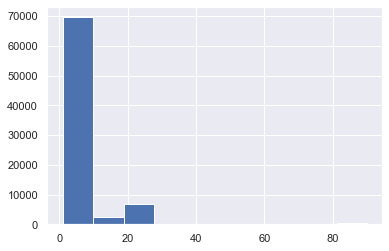

In [52]:
h2 = newdata["Vehicle_Type"].hist()

vt_mean = newdata["Vehicle_Type"].mean()
vt_median = newdata["Vehicle_Type"].median()
print("Vehicle_Type mean: {0:.4f}, median: {1:.4f}".format(vt_mean, vt_median))

newdata["Vehicle_Type"].fillna(vt_median, inplace=True)
newdata["Vehicle_Type"].isna().sum()


Sex_of_Driver mean: 1.3492, median: 1.0000


0

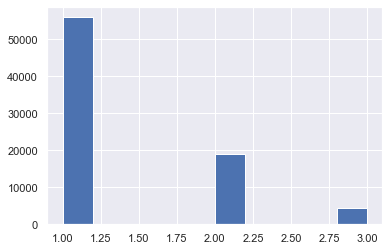

In [53]:
h3 = newdata["Sex_of_Driver"].hist()

sod_mean = newdata["Sex_of_Driver"].mean()
sod_median = newdata["Sex_of_Driver"].median()
print("Sex_of_Driver mean: {0:.4f}, median: {1:.4f}".format(sod_mean, sod_median))

newdata["Sex_of_Driver"].fillna(sod_median, inplace=True)
newdata["Sex_of_Driver"].isna().sum()


Age_of_Driver mean: 37.8645, median: 36.0000


0

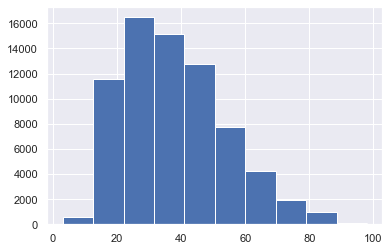

In [54]:
h4 = newdata["Age_of_Driver"].hist()

aod_mean = newdata["Age_of_Driver"].mean()
aod_median = newdata["Age_of_Driver"].median()
print("Age_of_Driver mean: {0:.4f}, median: {1:.4f}".format(aod_mean, aod_median))

newdata["Age_of_Driver"].fillna(aod_median, inplace=True)
newdata["Age_of_Driver"].isna().sum()


Engine_Capacity_(CC) mean: 1918.8084, median: 1597.0000


0

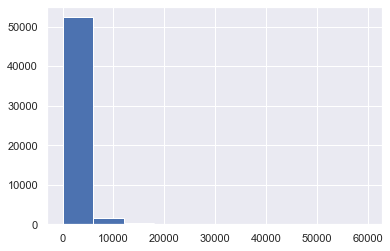

In [55]:
h5 = newdata["Engine_Capacity_(CC)"].hist()

ec_mean = newdata["Engine_Capacity_(CC)"].mean()
ec_median = newdata["Engine_Capacity_(CC)"].median()
print("Engine_Capacity_(CC) mean: {0:.4f}, median: {1:.4f}".format(ec_mean, ec_median))

newdata["Engine_Capacity_(CC)"].fillna(ec_median, inplace=True)
newdata["Engine_Capacity_(CC)"].isna().sum()


Age_of_Vehicle mean: 6.6582, median: 6.0000


0

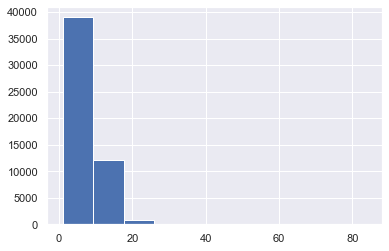

In [56]:
h6 = newdata["Age_of_Vehicle"].hist()

aov_mean = newdata["Age_of_Vehicle"].mean()
aov_median = newdata["Age_of_Vehicle"].median()
print("Age_of_Vehicle mean: {0:.4f}, median: {1:.4f}".format(aov_mean, aov_median))

newdata["Age_of_Vehicle"].fillna(aov_median, inplace=True)
newdata["Age_of_Vehicle"].isna().sum()


7. Pomocou kontigenčnej tabuľky vyjadrite závislosti medzi nasledujúcimi atribútmi a cieľovým atribútom `Accident_Severity`:
* `Day_of_Week` 
* `Sex_of_Driver`
* `Age_of_Driver` (nutné vhodne diskretizovať tento atribút)

Použite niektorú z vizualizácií knižnice seaborn na grafické zobrazenie týchto vzťahov. (5b)

In [57]:
newdata["Age_of_Driver"].describe()


count    79382.000000
mean        37.681666
std         15.053129
min          3.000000
25%         26.000000
50%         36.000000
75%         46.000000
max         98.000000
Name: Age_of_Driver, dtype: float64

In [58]:
newdata["Age_of_Driver_ordinal"] = pd.cut(newdata["Age_of_Driver"], bins=[0, 30, 60, 100], include_lowest=True, labels=["age to 30", "age 30-60", "age over 60"])
newdata["Age_of_Driver_ordinal"].value_counts()


age 30-60      45638
age to 30      27100
age over 60     6644
Name: Age_of_Driver_ordinal, dtype: int64

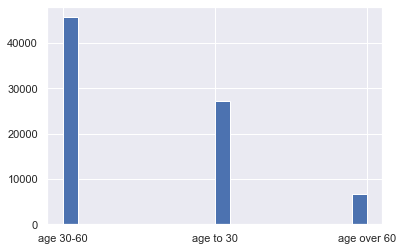

In [59]:
p = newdata["Age_of_Driver_ordinal"].hist(bins=20)


In [60]:
table_1 = pd.pivot_table(newdata, index=["Age_of_Driver_ordinal", "Sex_of_Driver", "Day_of_Week"], values="Accident_Severity", aggfunc=["mean", "count"], margins=True)
table_1


mean  \
                                                Accident_Severity   
Age_of_Driver_ordinal Sex_of_Driver Day_of_Week                     
age to 30             1.0           1                    2.260501   
                                    2                    2.289203   
                                    3                    2.322234   
                                    4                    2.325376   
                                    5                    2.324188   
...                                                           ...   
age over 60           3.0           2                    2.333333   
                                    3                    2.333333   
                                    5                    2.000000   
                                    7                    2.000000   
All                                                      2.337583   

                                                            count  
                                                Accident_Severity  
Age_of_Driver_ordinal Sex_of_Driver Day_of_Week                    
age to 30             1.0           1                        2833  
                                    2                        2621  
                                    3                        2793  
                                    4                        2723  
                                    5                        2770  
...                                                           ...  
age over 60           3.0           2                           3  
                                    3                           3  
                                    5                           1  
                                    7                           1  
All                                                         79382  

[62 rows x 2 columns]

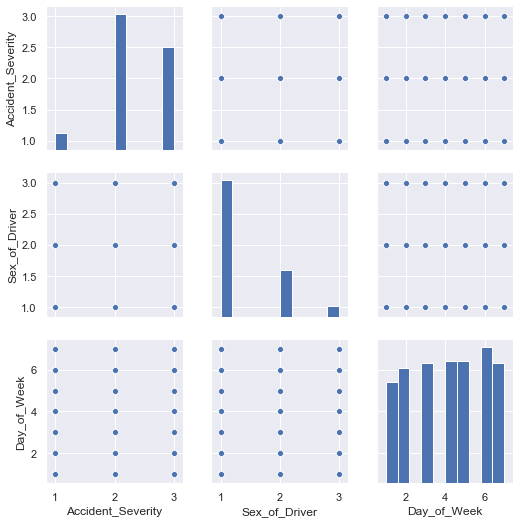

In [61]:
atributes = newdata[["Accident_Severity", "Age_of_Driver_ordinal", "Sex_of_Driver", "Day_of_Week"]]
mapa = sns.pairplot(atributes)


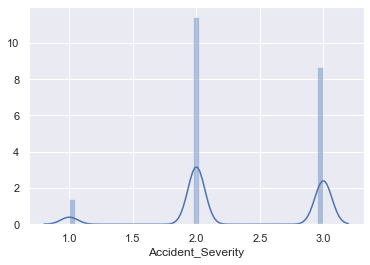

In [62]:
graf = sns.distplot(atributes['Accident_Severity'])


/Users/lucia/opt/anaconda3/envs/jupyterlab_older/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/lucia/opt/anaconda3/envs/jupyterlab_older/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


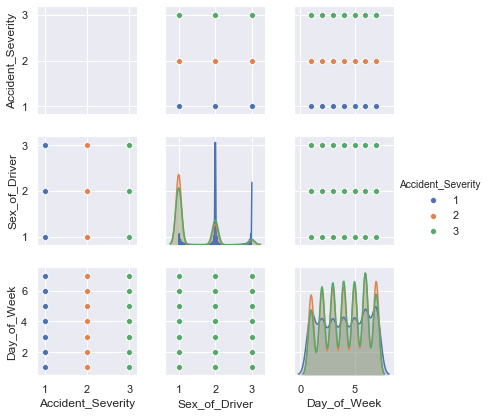

In [63]:
graf_2 = sns.pairplot(atributes, hue='Accident_Severity', height=2)


8. Vytvorte dátovú množinu, v ktorej nahradíte všetky nominálne atribúty za číselné alebo binárne. (3b)

In [64]:
datatest = newdata.copy()
datatest = datatest.drop(columns=["Age_of_Driver"])


In [65]:
datatest["Age_of_Driver_ordinal"] = datatest["Age_of_Driver_ordinal"].map({"age to 30": 0, "age 30-60": 1, "age over 60": 2})


In [66]:
datatest = datatest.drop(columns=["Engine_Capacity_(CC)", "Age_of_Vehicle"]) # vymazujem kvôli veľkému množstvu chýbajúcich hodnôt


9. Rozdeľte dáta na trénovaciu a testovaciu množinu v pomere 70/30. Ako cieľový atribút použite atribút `Accident_Severity`. (2b)

In [67]:
X_datatest = datatest.drop('Accident_Severity', axis = 1)
y_datatest = datatest['Accident_Severity']

print(X_datatest.shape)
print(y_datatest.shape)


(79382, 10)
(79382,)


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_datatest, y_datatest, test_size=0.3, random_state=1)
X_train.shape


(55567, 10)

10. Spočítajte pomocou funkcie `SelectKBest` a `mutual_score_info` významosti jednotlivých atribútov pre predikciu v trénovacej množine. Skúste získané informácie využiť pri predspracovaní dát pre niektoré z modelov. (3b)

In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

oe = OrdinalEncoder()
oe.fit(X_train)
X_train = pd.DataFrame(oe.transform(X_train))
X_test = pd.DataFrame(oe.transform(X_test))

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)


In [70]:
fs = SelectKBest(score_func=mutual_info_classif, k="all")
X_train = fs.fit_transform(X_train, y_train)
X_test = fs.transform(X_test)


In [71]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))


Feature 0: 0.002942
Feature 1: 0.007751
Feature 2: 0.008625
Feature 3: 0.011744
Feature 4: 0.002077
Feature 5: 0.002042
Feature 6: 0.014371
Feature 7: 0.016353
Feature 8: 0.002419
Feature 9: 0.003605


11. Natrénujte rôzne klasifikačné modely pre predikciu atribútu `Accident_Severity`. Natrénujte nasledovné modely s prednastavenými parametrami:
* k-najbližších susedov
* Rozhodovacie stromy
* Random forests

Jednotlivé modely otestujte pomocou 10-násobnej krížovej validácie pomocou metriky `accuracy`. 

Pozor - pre jednotlivé modely zvoľte vhodný spôsob predspracovania (možná modifikácia predspracovania v kroku 8). (6b) 

In [72]:
# K-najbližších susedov

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(f"Accuracy prvého modelu: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy prvého modelu: 0.52 (+/- 0.01)


In [73]:
# Rozhodovacie stromy

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
print(f"Accuracy druhého modelu: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy druhého modelu: 0.5316 (+/- 0.01)


In [74]:
# Random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
print(f"Accuracy tretieho modelu: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy tretieho modelu: 0.5436 (+/- 0.01)


12. Porovnajte natrénované modely aj pomocou ROC krivky testovacej množine. Identifikujte model, ktorý dáva najlepšie výsledky s prednastavenými parametrami. 
V tomto kroku sa posnažte vyladiť model nájdením najvhodnejších parametrov pomocou `GridSearchCV`. Nájdite a vypíšte najlepšiu kombináciu parametrov. (4b)

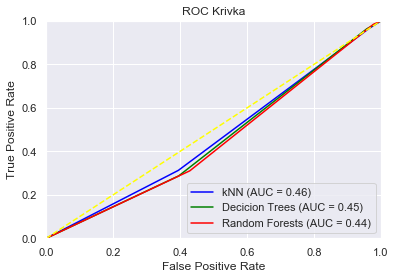

In [75]:
from sklearn.metrics import roc_curve,auc

# k-NN - K-najbližších susedov

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_knn=knn.predict(X_test)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_knn, pos_label=1)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Rozhodovacie stromy

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_dt=dt.predict(X_test)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_dt, pos_label=1)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Random forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf=rf.predict(X_test)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_rf, pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ROC krivka

plt.title('ROC Krivka')

plt.plot(fpr_knn, tpr_knn, color='blue', label = 'kNN (AUC = %0.2f)' % roc_auc_knn) 
plt.plot(fpr_dt, tpr_dt, color='green', label = 'Decicion Trees (AUC = %0.2f)' % roc_auc_dt) 
plt.plot(fpr_rf, tpr_rf, color='red', label = 'Random Forests (AUC = %0.2f)' % roc_auc_rf) 

plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],linestyle='--', color='yellow')
plt.xlim([0, 1]) 
plt.ylim([0, 1])
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()


In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = [{ "n_estimators": [100,200,300],
               "criterion": ["gini", "entropy"],
                "min_samples_split": [2,4,6],
               "min_samples_leaf": [1,5,10]}]


In [77]:
rf = RandomForestClassifier()

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print('Najlepšia kombinácia parametrov modelu "Random forest" je:')
print(grid_rf.best_params_)
print()
print('Hodnota presnosti modelu "Random forest" pri tejto kombinácii je:')
print(grid_rf.best_score_)


Najlepšia kombinácia parametrov modelu "Random forest" je:
{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 200}

Hodnota presnosti modelu "Random forest" pri tejto kombinácii je:
0.5694567273572491


13. Natrénujte na celej trénovacej množine model s najlepšími parametrami. Model otestujte na testovacej množine. Vyhodnoťte model pomocou metrík `accuracy`, `precision` a `recall`. Vypíšte preň `confusion matrix`. (3b)

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

rf = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 10, min_samples_split = 6, n_estimators = 200)
rf.fit(X_train, y_train)
y_model = rf.predict(X_test)

print(f"Accuracy modelu: {accuracy_score(y_test, y_model)}")
print(f"Precision (presnosť) modelu: {precision_score(y_test, y_model, average='weighted')}")
print(f"Recall (návratnosť) modelu: {recall_score(y_test, y_model, average='weighted')}")
print(f"Confusion Matrix modelu:\n{confusion_matrix(y_test, y_model)}")


Accuracy modelu: 0.5722863741339492
Precision (presnosť) modelu: 0.5305977379174419
Recall (návratnosť) modelu: 0.5722863741339492
Confusion Matrix modelu:
[[   0 1363  208]
 [   0 9529 3190]
 [   0 5425 4100]]


/Users/lucia/opt/anaconda3/envs/jupyterlab_older/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
